## Python statistics essential training - 05_06_bayesian

Standard imports

In [1]:
import math

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib
import matplotlib.pyplot as pp

In [4]:
%matplotlib inline

In [5]:
pip install pymc3

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pymc3 as pm

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\monke\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [7]:
n = 100
k = 61

with pm.Model() as coin_context:
    p = pm.Uniform('p', 0.40, 0.80)
    
    y = pm.Binomial('y', n=n, p=p, observed=k)
    
    trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 67 seconds.


In [8]:
pm.summary(trace)

C:\Users\monke\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
p,0.609,0.048,0.522,0.701,0.0,0.0,16502.0,16502.0,16522.0,24068.0,1.0


C:\Users\monke\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<AxesSubplot:title={'center':'p'}>,
        <AxesSubplot:title={'center':'p'}>]], dtype=object)

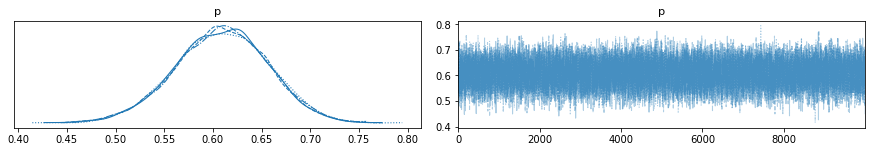

In [9]:
pm.traceplot(trace)

In [10]:
gdata = pd.read_csv('gapminder.csv').query('year == 1985')

In [11]:
gdata.sort_values('age5_surviving', inplace = True)

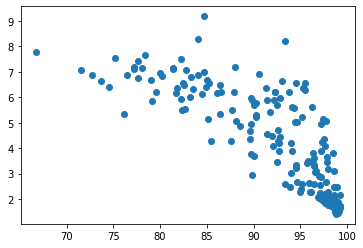

In [12]:
pp.scatter(gdata['age5_surviving'], gdata['babies_per_woman'])

In [14]:
with pm.Model() as gapminder_context:
    intercept = pm.Uniform('intercept',5,15)
    slope = pm.Uniform('slope',-1,1)
    
    babies = pm.Normal("babies", mu=intercept + slope * (gdata['age5_surviving'] - 65), sd = 1, observed = gdata['babies_per_woman'])
    
    trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [slope, intercept]


Sampling 4 chains for 1_000 tune and 1_560 draw iterations (4_000 + 6_240 draws total) took 1075 seconds.


KeyboardInterrupt: 

In [ ]:
babies = trace['intercept'].mean() + trace['slope'].mean() * (gdata['age5_surviving'] - 65)

In [ ]:
pp.scatter(gdata['age5_surviving'], gdata['babies_per_woman'])
pp.plot(gdata['age5_surviving'], babies, 'C1')

In [ ]:
pp.scatter(gdata['age5_surviving'], gdata['babies_per_woman'])

for i, intercept, slope in zip(range(100), trace['intercept'][::50], trace['slope'][::50]):
    babies = intercept + slope * (gdata['age5_survivng'] - 65)
    pp.plot(gdata['age5_surviving'], babies, 'C1', alpha=0.05)